# Importing Modules 

In [64]:
%reset -f

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import os.path
import os
import pickle
from scipy.ndimage.interpolation import shift
import scipy.stats as stats

from intanRead import IntanRaw_read_data

from tkinter import Tk
from tkinter.filedialog import askopenfilename

## Getting the data file 

In [66]:
defaultDataDir = "C:\\Users\Student\Desktop\RHD2000interface_compiled_v1_5_2"

if not os.path.isdir(defaultDataDir):
    defaultDataDir = "C:\\"
    
root = Tk()
root.withdraw()

dataFileAdd =  askopenfilename(initialdir = defaultDataDir,title = "Select file",\
                            filetypes = (("Intan raw files","*.rhd"),("all files","*.*")))

dataFileName = os.path.basename(dataFileAdd)[:-4]
dataFileBaseFolder = os.path.dirname(dataFileAdd)

## Reading the data file

In [67]:
readResult = IntanRaw_read_data.IntanRaw_read_data(dataFileAdd)


Reading Intan Technologies RHD2000 Data File, Version 1.5

Found 0 amplifier channels.
Found 0 auxiliary input channels.
Found 0 supply voltage channels.
Found 1 board ADC channel.
Found 0 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 190.656 seconds of data.  Amplifiers were sampled at 20.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 2.6 seconds


In [68]:
cameraStrobe = deepcopy(readResult['board_adc_data'][0])

Fs = readResult['frequency_parameters']['board_dig_in_sample_rate']

cameraStrobe[cameraStrobe<2] = 0
cameraStrobe[cameraStrobe>2] = 1

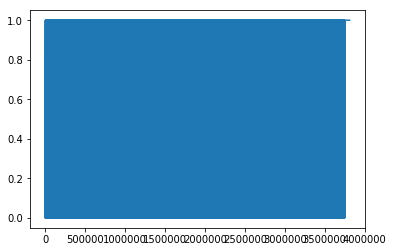

In [69]:
plt.plot(cameraStrobe)

### falling and rising edges of the camera strobe

In [72]:
upTransitionStrobe = np.where (np.diff(cameraStrobe)==1)[0]
downTransitionStrobe = np.where ((np.diff(cameraStrobe)==-1))[0]

print(upTransitionStrobe.shape,downTransitionStrobe.shape)

(5628,) (5627,)


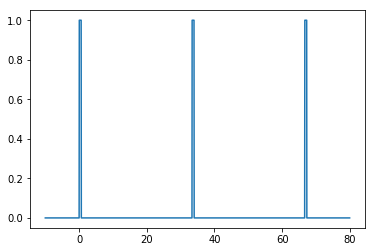

In [80]:
upTransitToLook = 0
windowToLook = 80 #ms
windowToLookBack = 10 #ms

plt.plot(np.arange(-windowToLookBack,windowToLook,1e3/Fs),cameraStrobe\
                 [int(upTransitionStrobe[upTransitToLook]-windowToLookBack*Fs/1e3):\
                       int(upTransitionStrobe[upTransitToLook]+windowToLook*Fs/1e3)])


In [81]:
(upTransitionStrobe - downTransitionStrobe)*1e3/Fs

ValueError: operands could not be broadcast together with shapes (5628,) (5627,) 

In [48]:
np.diff(downTransitionStrobe)*1e3/Fs

array([54.4 , 33.6 , 33.45, ..., 33.3 , 33.35, 33.35])